Aumentacion de series temporales

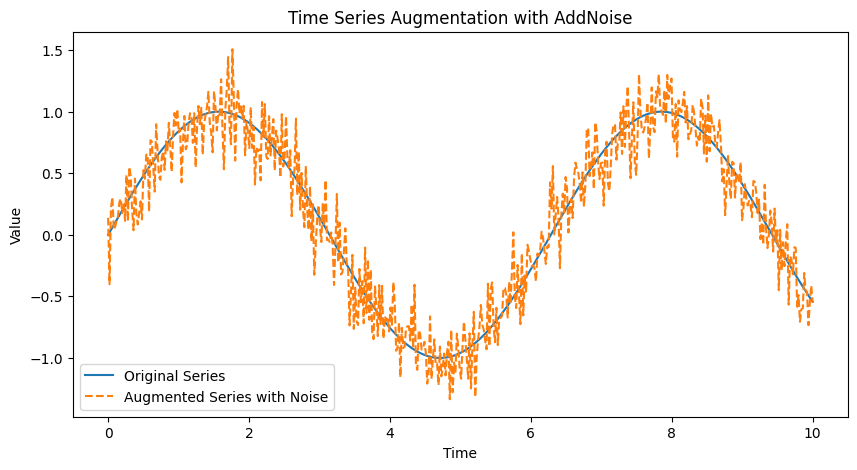

In [7]:
import numpy as np
from tsaug import AddNoise
import matplotlib.pyplot as plt

# Generate some example data: a simple sine wave
time = np.linspace(0, 10, 500)
original_series = np.sin(time)

# Initialize the AddNoise augmenter
augmenter = AddNoise(scale=0.1)  # `scale` controls the standard deviation of the noise

# Augment the data
augmented_series = augmenter.augment(original_series)

# Plot the original and augmented series
plt.figure(figsize=(10, 5))
plt.plot(time, original_series, label='Original Series')
plt.plot(time, augmented_series, label='Augmented Series with Noise', linestyle='--')
plt.title('Time Series Augmentation with AddNoise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


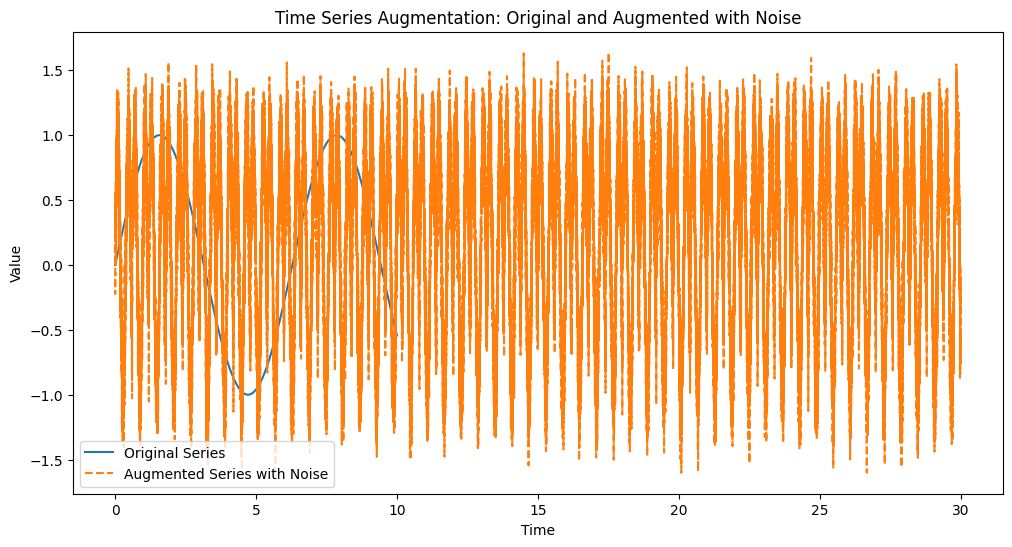

In [8]:
import numpy as np
from tsaug import AddNoise
import matplotlib.pyplot as plt

# Generate some example data: a simple sine wave
time = np.linspace(0, 10, 500)
original_series = np.sin(time)

# Initialize the AddNoise augmenter
noise_augmenter = AddNoise(scale=0.1)

# Manually repeat the data and apply noise
augmented_series = np.tile(original_series, 50)  # Repeat the series 3 times
augmented_series = noise_augmenter.augment(augmented_series)

# Create a new time array for the augmented data
augmented_time = np.linspace(0, 30, len(augmented_series))  # Adjusted for the repeated series

# Plot the original and augmented series
plt.figure(figsize=(12, 6))
plt.plot(time, original_series, label='Original Series')
plt.plot(augmented_time, augmented_series, label='Augmented Series with Noise', linestyle='--')
plt.title('Time Series Augmentation: Original and Augmented with Noise')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


**vamos a crear una red neuronal LSTM para aprender el patron descripto por la serie temporal anterior**


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'augmented_series' is your dataset and 'model' is already trained
# Define the number of future steps to predict
future_steps = 20
n_steps = 10
n_features = 1

# Select the last n_steps values from the dataset as the initial input for prediction
input_sequence = data[-n_steps:]
input_sequence = input_sequence.reshape((1, n_steps, n_features))

# Predict the next 20 values
predictions = []
for _ in range(future_steps):
    # Predict the next value
    yhat = model.predict(input_sequence, verbose=0)[0][0]
    # Append the prediction
    predictions.append(yhat)
    # Update the input sequence to include the new prediction and drop the oldest value
    new_point = np.array([[yhat]])
    new_point = new_point.reshape((1, 1, n_features))  # Correctly reshape new_point
    input_sequence = np.concatenate((input_sequence[:, 1:, :], new_point), axis=1)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(data, label='Original Series')
plt.plot(np.arange(len(data), len(data) + future_steps), predictions, 'ro-', label='Predicted Future')
plt.title('Forecasting the Next 20 Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()


NameError: name 'data' is not defined

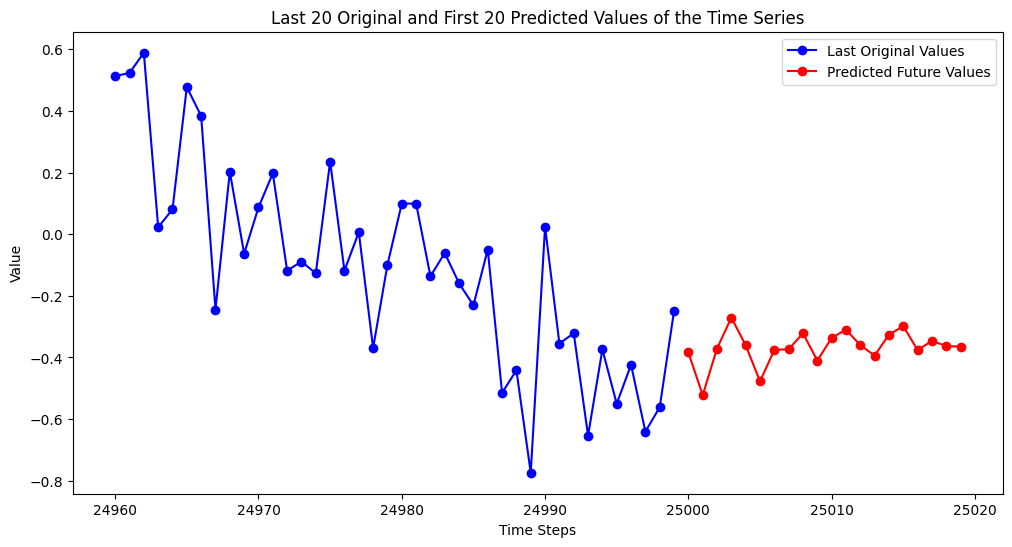

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'data' is your original series and 'predictions' contains the 20 predicted values

# Last 20 values from the original series
last_original_values = data[-40:]

# Combine the last original values with the predicted values
combined_series = np.concatenate((last_original_values, predictions))

# Generate indices for the x-axis
original_indices = np.arange(len(data) - 40, len(data))
predicted_indices = np.arange(len(data), len(data) + 20)

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(original_indices, last_original_values, 'bo-', label='Last Original Values')
plt.plot(predicted_indices, predictions, 'ro-', label='Predicted Future Values')
plt.title('Last 20 Original and First 20 Predicted Values of the Time Series')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.show()
